<a href="https://colab.research.google.com/github/thuc-github/MIS710-T12023/blob/main/A1/MIS710%20A1%20Template%20T1%202023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MIS710 Machine Learning in Business - Assignment 1

**Student Name:** Ngoc Bao Tran Doan

**Student ID:** 224779521

<a id = "cell_executivesummary"></a>
##**0. Business understandings, problem, solution and recommendations**

#### NOTE: all the instructions and hints given in this template should be removed from your final submission. (Including this line)

**Business Understandings and Problems**

Play Quest Conquer (PQC) is an online gaming platform in Sydney. Their business model is a subscription model where users pay to subscribe to access, purchase engage with and rate an extensive range of games. PQC has observed significant variability in game ratings across their platforms.

**Objective**

Our objective is to identify and predict the factors that most strongly influence game ratings on platform using data-driven techniques. The project involves the application of machine learning models, including Multi-Linear Regression and Random Forest, employed to analyze and predict game ratings, thereby informing strategic business decisions that can improve user engagement, retention and the company revenue.

**Recommendations**
•	To optimise rater engagement, implement strategies such as gamified rating systems and partnerships with gaming influencers for more user-generated content.
•	There is a need to balance the complexity levels to improve engagement and satisfaction, which can lead to higher average ratings.
•	Utilise data insights and analysis to guide new game development and marketing campaigns, focusing more on highlighting features that drive higher ratings.


## **1. Import libraries**


In [118]:
#load libraries
import pandas as pd #for data manipulation and analysis
import numpy as np #for working with arrays

#import data visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

##**2. Mount your Google drive**

In [119]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **3. Exploratory Data Analysis**


1.   Load the dataset
2.   Inspect the data
3.   Initial cleansing



In [120]:
records = pd.read_csv("/PQC_data (1).csv")
print(records)

print('Sample size:', records.shape[0])
print('Number of columns:', records.shape[1])

       Game_ID                                          Game_Name  \
0         9048                                    Age of Industry   
1        40086                                 Going The Distance   
2        12545                                             Inside   
3        62639                                        New Bedford   
4        26419                            Sekigahara fierce fight   
...        ...                                                ...   
24808    47621                                      Mutterbhnchen   
24809    52815                           Mercadores de Dur Durany   
24810    11697  The Lord of the Rings: The Return of the King ...   
24811    40892                                        Sea Command   
24812    30243                                               B.S.   

       Released_Year    Game_Type    Age_Category  Min_Players  Max_Players  \
0               2010     BaseGame  12 to under 18            2            5   
1            

In [121]:
print("Shape of records: {}".format(records.shape))

Shape of records: (24813, 17)


In [122]:
records.describe()

,Game_ID,Released_Year,Min_Players,Max_Players,Average_Complexity,Complexity_Raters,Average_Play_Time,Owner_Number,Trader_Number,HighInterest_Number,Interest_Number,Rater_Number,Comment_Number,Average_Rating
count,24813.000,24813.000,24813.000,24813.000,24813.000,24813.000,24813.000,24813.000,24813.000,24813.000,24813.000,24813.000,24813.000,24813.000
mean,30936.023,1997.201,2.062,5.321,1.986,42.554,55.214,674.204,23.187,32.461,111.183,426.814,125.987,6.215
std,18959.062,126.088,0.674,7.077,0.826,190.106,42.588,2453.510,61.474,95.827,378.753,1881.193,457.627,1.512
min,7074.000,-99.000,0.000,0.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,14652.000,2000.000,2.000,4.000,1.231,1.000,25.000,17.000,0.000,0.000,2.000,7.000,4.000,5.556
50%,24721.000,2007.000,2.000,4.000,2.000,4.000,45.000,77.000,3.000,3.000,9.000,27.000,13.000,6.428
75%,47162.000,2012.000,2.000,6.000,2.500,16.000,60.000,376.000,17.000,18.000,49.000,142.000,57.000,7.147
max,71822.000,2017.000,9.000,99.000,5.000,5996.000,180.000,73188.000,1395.000,1586.000,6402.000,53680.000,11798.000,10.000


In [123]:
records.head()

,Game_ID,Game_Name,Released_Year,Game_Type,Age_Category,Min_Players,Max_Players,Average_Complexity,Complexity_Raters,Average_Play_Time,Owner_Number,Trader_Number,HighInterest_Number,Interest_Number,Rater_Number,Comment_Number,Average_Rating
0,9048,Age of Industry,2010,BaseGame,12 to under 18,2,5,3.364,231,120,2697,71,293,796,2323,751,7.519
1,40086,Going The Distance,1998,BaseGame,under 5,2,8,2.000,3,60,3,0,1,4,4,2,7.500
2,12545,Inside,2007,BaseGame,5 to under 12,2,2,2.000,12,10,187,8,20,49,137,46,6.488
3,62639,New Bedford,2016,BaseGame,12 to under 18,1,4,2.400,5,75,62,1,36,184,28,56,7.661
4,26419,Sekigahara fierce fight,1988,BaseGame,12 to under 18,1,2,3.000,2,120,4,0,1,3,3,1,7.500


In [124]:
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24813 entries, 0 to 24812
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Game_ID              24813 non-null  int64  
 1   Game_Name            24806 non-null  object 
 2   Released_Year        24813 non-null  int64  
 3   Game_Type            24813 non-null  object 
 4   Age_Category         24813 non-null  object 
 5   Min_Players          24813 non-null  int64  
 6   Max_Players          24813 non-null  int64  
 7   Average_Complexity   24813 non-null  float64
 8   Complexity_Raters    24813 non-null  int64  
 9   Average_Play_Time    24813 non-null  int64  
 10  Owner_Number         24813 non-null  int64  
 11  Trader_Number        24813 non-null  int64  
 12  HighInterest_Number  24813 non-null  int64  
 13  Interest_Number      24813 non-null  int64  
 14  Rater_Number         24813 non-null  int64  
 15  Comment_Number       24813 non-null 

###**3.1 Explore the Categorical Variables**



In [125]:
categorical = [col for col in records.columns if records[col].dtype=='O']
print('There are {} numerical variables'.format(len(categorical)))
print(categorical)
records[categorical].head()

There are 3 numerical variables
['Game_Name', 'Game_Type', 'Age_Category']


,Game_Name,Game_Type,Age_Category
0,Age of Industry,BaseGame,12 to under 18
1,Going The Distance,BaseGame,under 5
2,Inside,BaseGame,5 to under 12
3,New Bedford,BaseGame,12 to under 18
4,Sekigahara fierce fight,BaseGame,12 to under 18


###**3.2 Explore the Numerical Variables**

In [126]:
numerical = [col for col in records.columns if records[col].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))
print(numerical)
records[numerical].head()

There are 14 numerical variables
['Game_ID', 'Released_Year', 'Min_Players', 'Max_Players', 'Average_Complexity', 'Complexity_Raters', 'Average_Play_Time', 'Owner_Number', 'Trader_Number', 'HighInterest_Number', 'Interest_Number', 'Rater_Number', 'Comment_Number', 'Average_Rating']


,Game_ID,Released_Year,Min_Players,Max_Players,Average_Complexity,Complexity_Raters,Average_Play_Time,Owner_Number,Trader_Number,HighInterest_Number,Interest_Number,Rater_Number,Comment_Number,Average_Rating
0,9048,2010,2,5,3.364,231,120,2697,71,293,796,2323,751,7.519
1,40086,1998,2,8,2.000,3,60,3,0,1,4,4,2,7.500
2,12545,2007,2,2,2.000,12,10,187,8,20,49,137,46,6.488
3,62639,2016,1,4,2.400,5,75,62,1,36,184,28,56,7.661
4,26419,1988,1,2,3.000,2,120,4,0,1,3,3,1,7.500


###**3.3 Estimate Correlation Coefficients Between Average Ratings and Numerical Variables**

In [127]:
import pandas as pd
numerical_records = records.select_dtypes(include=['number'])
(numerical_records.corr().style.background_gradient(cmap='RdBu', vmin=-1, vmax=1))

,Game_ID,Released_Year,Min_Players,Max_Players,Average_Complexity,Complexity_Raters,Average_Play_Time,Owner_Number,Trader_Number,HighInterest_Number,Interest_Number,Rater_Number,Comment_Number,Average_Rating
Game_ID,1.000000,-0.099763,-0.068269,0.044892,-0.000336,-0.229089,-0.078539,-0.221237,-0.331709,-0.280515,-0.260851,-0.229667,-0.270626,0.060145
Released_Year,-0.099763,1.000000,-0.002940,-0.001727,0.033520,0.012112,0.010280,0.018613,0.021276,0.026639,0.023905,0.014046,0.014864,0.056797
Min_Players,-0.068269,-0.002940,1.000000,0.178751,-0.083639,0.016860,-0.008265,0.011215,0.025037,-0.027774,-0.020978,0.018442,0.021681,-0.042629
Max_Players,0.044892,-0.001727,0.178751,1.000000,-0.080473,-0.006308,-0.035235,0.002069,-0.009867,-0.024167,-0.016391,-0.000769,-0.005107,-0.000373
Average_Complexity,-0.000336,0.033520,-0.083639,-0.080473,1.000000,0.095423,0.548647,0.103124,0.115519,0.206647,0.178376,0.086317,0.098317,0.361070
Complexity_Raters,-0.229089,0.012112,0.016860,-0.006308,0.095423,1.000000,0.074435,0.935890,0.798238,0.657546,0.762682,0.975234,0.977712,0.124693
Average_Play_Time,-0.078539,0.010280,-0.008265,-0.035235,0.548647,0.074435,1.000000,0.069422,0.082957,0.159876,0.134242,0.058269,0.071295,0.217515
Owner_Number,-0.221237,0.018613,0.011215,0.002069,0.103124,0.935890,0.069422,1.000000,0.831829,0.680142,0.792187,0.978215,0.952483,0.158640
Trader_Number,-0.331709,0.021276,0.025037,-0.009867,0.115519,0.798238,0.082957,0.831829,1.000000,0.550606,0.639263,0.814575,0.857042,0.128808
HighInterest_Number,-0.280515,0.026639,-0.027774,-0.024167,0.206647,0.657546,0.159876,0.680142,0.550606,1.000000,0.959193,0.696818,0.707791,0.231257


In [128]:
import pandas as pd
numerical_records = records.select_dtypes(include=['number'])
corr_matrix = numerical_records.corr()
(corr_matrix.style.background_gradient(cmap='RdBu', vmin=-1, vmax=1))
corr_matrix['Average_Rating'].sort_values(ascending=False)

,Average_Rating
Average_Rating,1.000
Average_Complexity,0.361
HighInterest_Number,0.231
Average_Play_Time,0.218
Interest_Number,0.204
Owner_Number,0.159
Comment_Number,0.142
Rater_Number,0.133
Trader_Number,0.129
Complexity_Raters,0.125


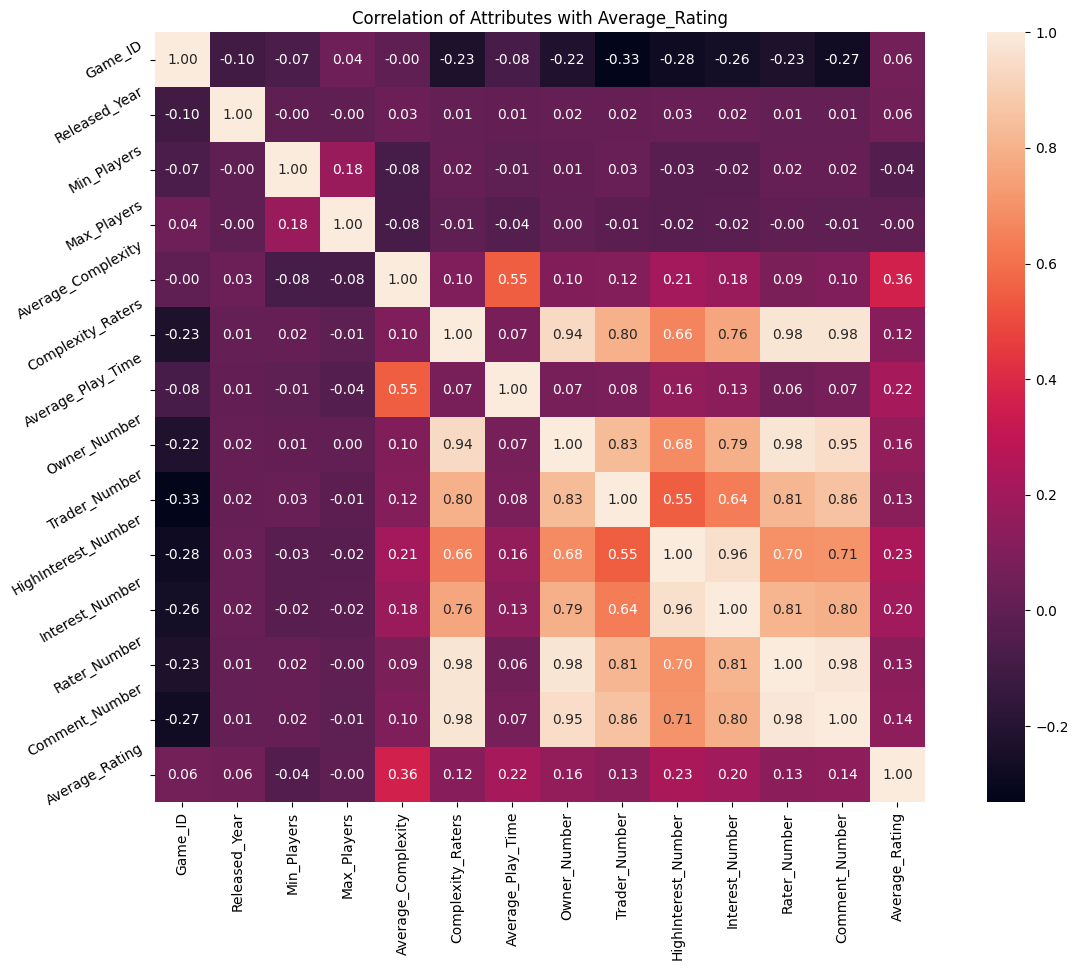

In [129]:
plt.figure(figsize=(16,10))
plt.title('Correlation of Attributes with Average_Rating')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='White')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

###**3.4 Explore Relationships Between Average Ratings and Categorical Variables**

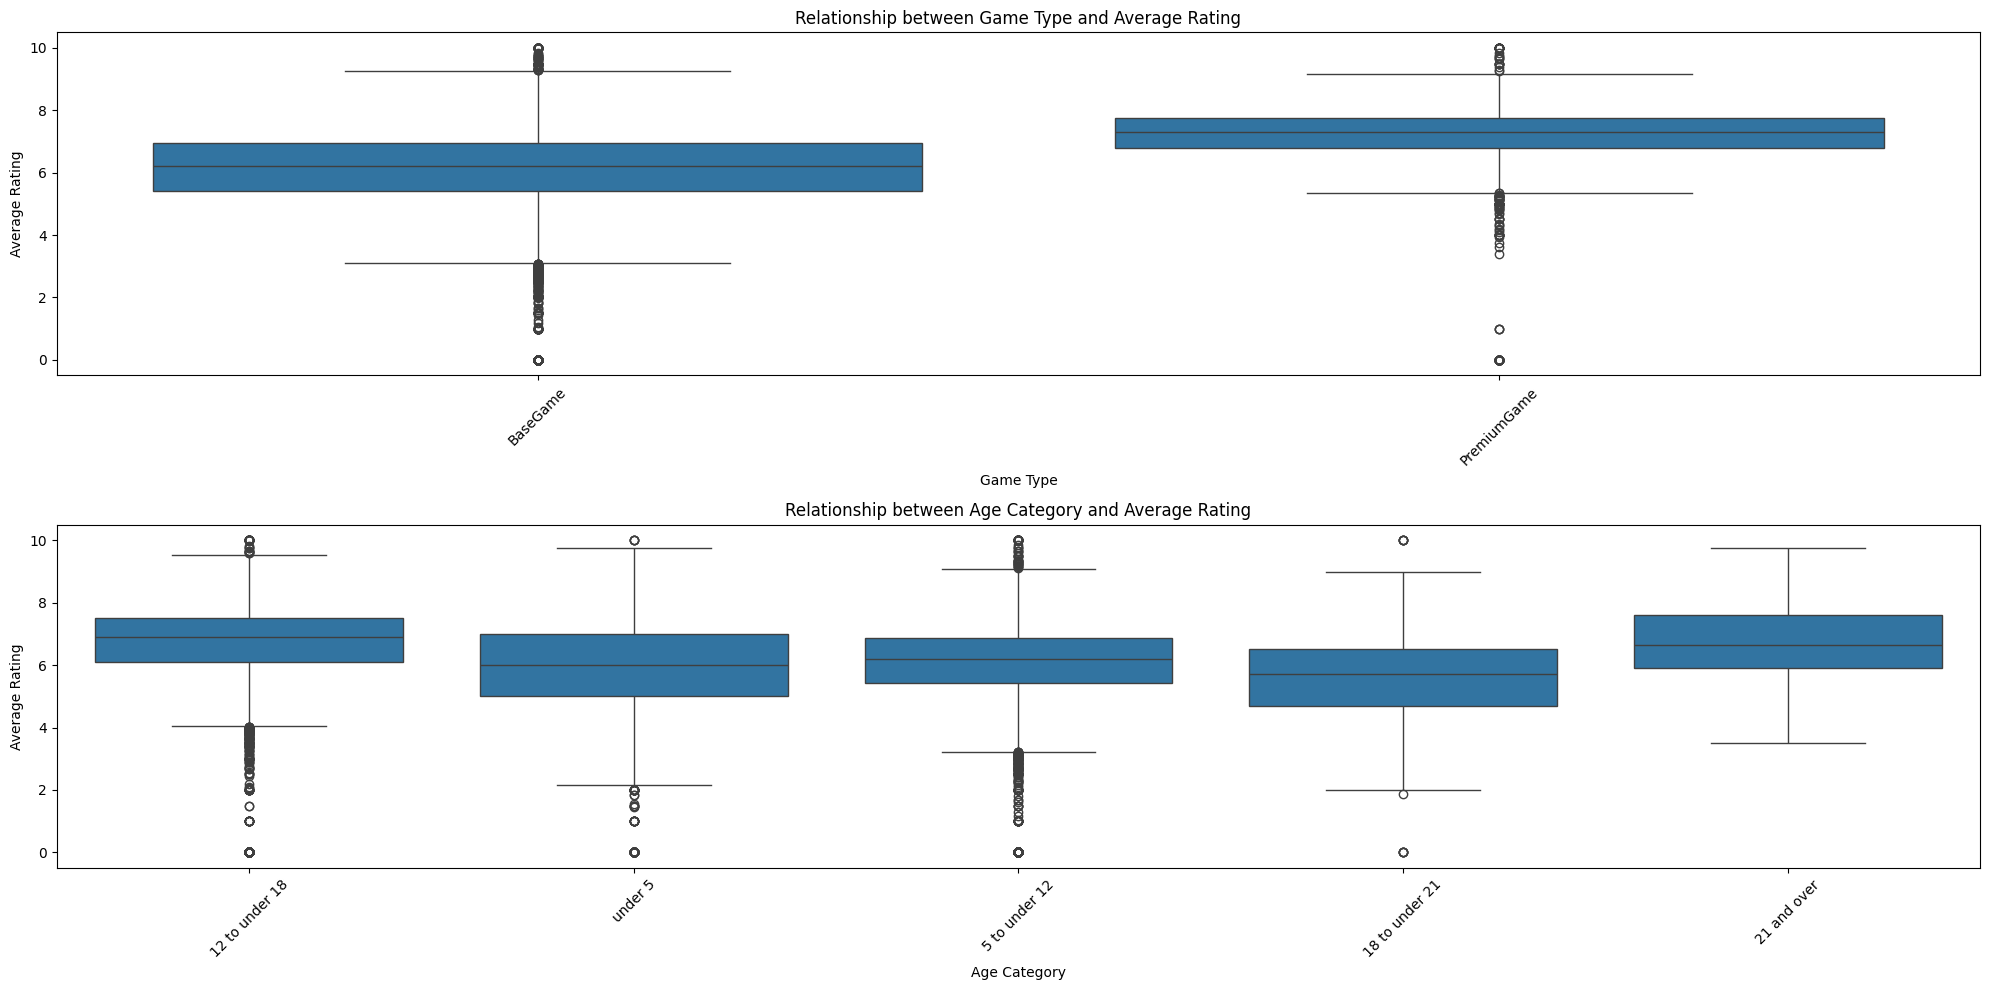

In [130]:
# List of categorical features based on metadata
categorical_features = ['Game_Type', 'Age_Category']

# Plot box plots for categorical features
plt.figure(figsize=(20, len(categorical_features) * 5))
for i, feature in enumerate(categorical_features):
    plt.subplot(len(categorical_features), 1, i + 1)
    sns.boxplot(x=records[feature], y=records['Average_Rating'])
    plt.title(f'Relationship between {feature.replace("_", " ")} and Average Rating')
    plt.xlabel(feature.replace('_', ' '))
    plt.ylabel('Average Rating')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


###**3.5 General Information and Game Configuration Summary Summary**

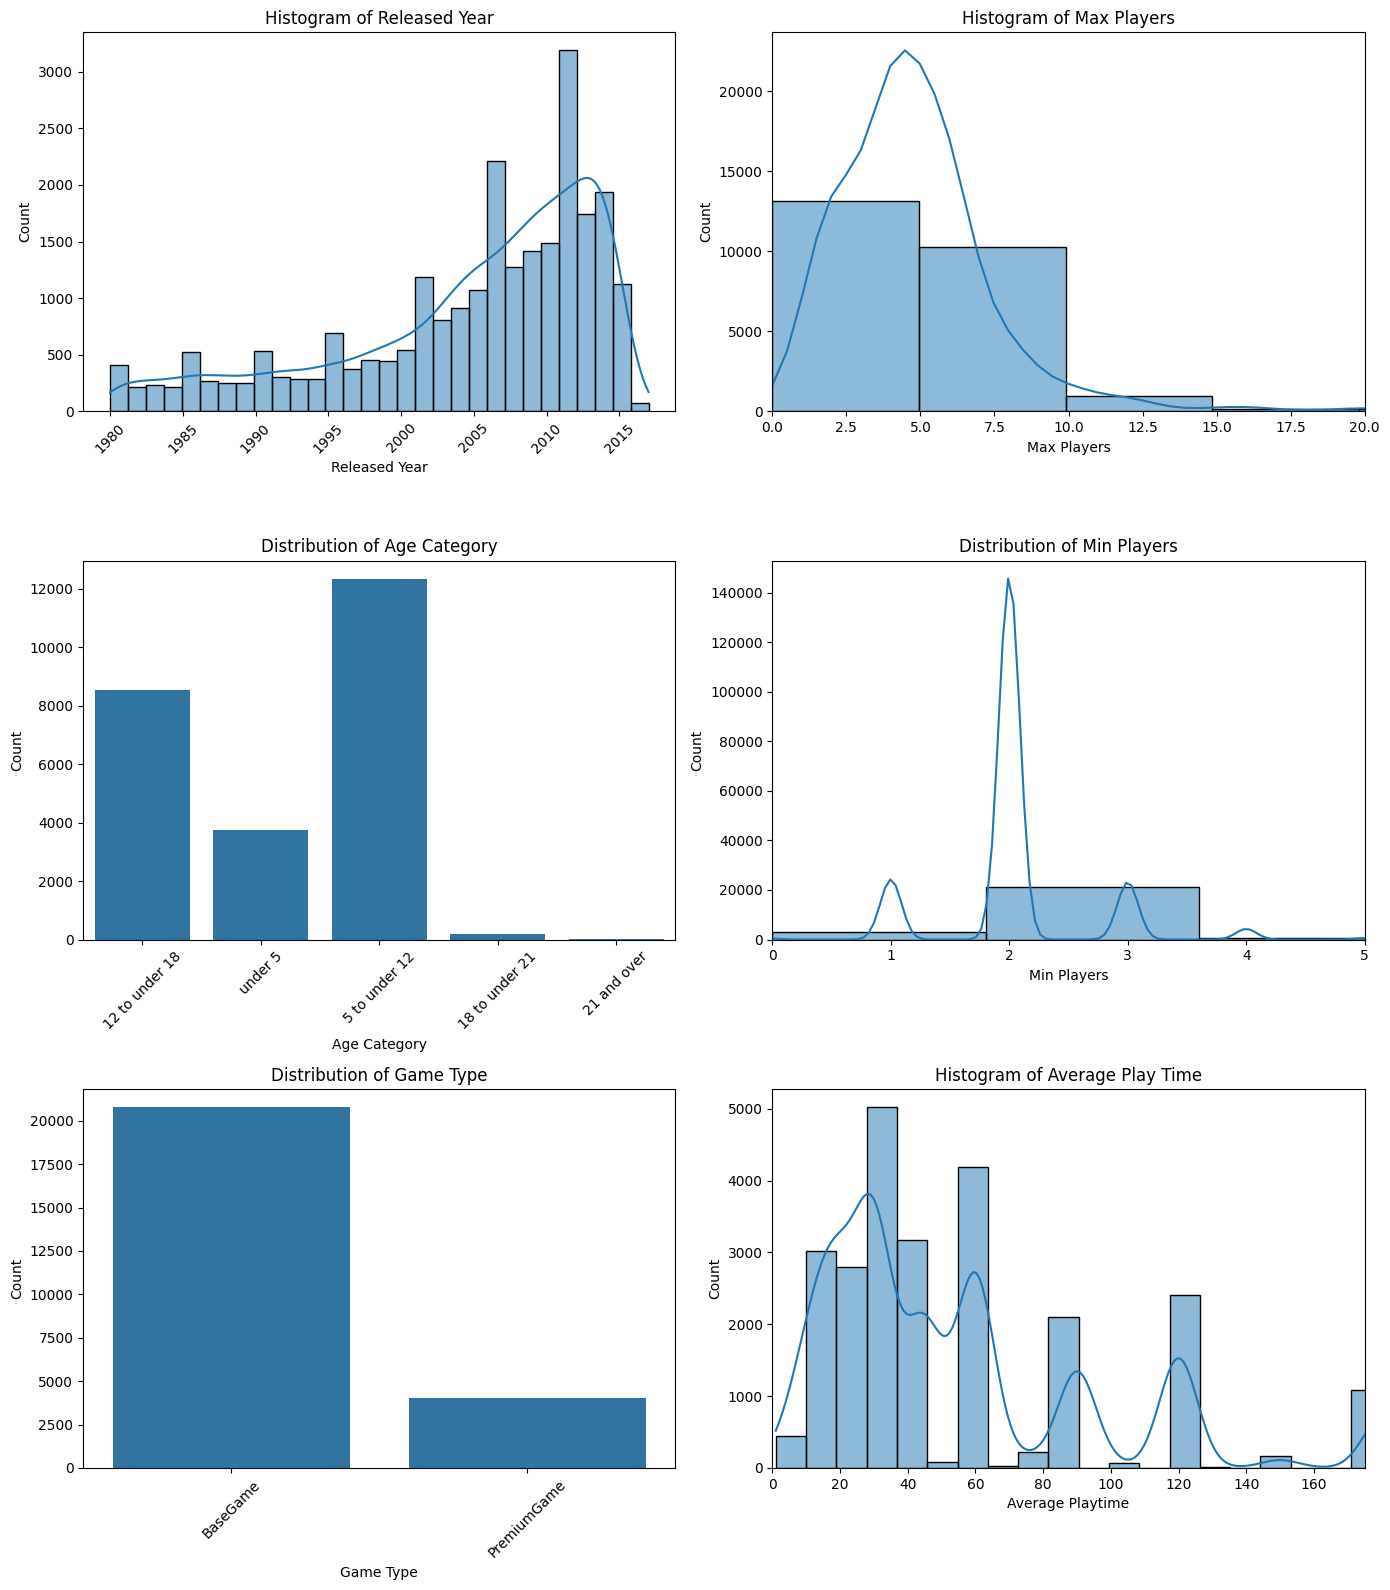

In [131]:
plt.figure(figsize=(14, 16))

# Histogram for Released_Year
plt.subplot(3, 2, 1)
sns.histplot(data=records[records['Released_Year'] >= 1950], x='Released_Year', bins=30, kde=True)
plt.title("Histogram of Released Year")
plt.xlabel('Released Year')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Histogram for Max_Players
plt.subplot(3, 2, 2)
sns.histplot(data=records, x='Max_Players', bins=20, kde=True)
plt.title("Histogram of Max Players")
plt.xlabel('Max Players')
plt.ylabel('Count')
plt.xlim(0, 20)

# Bar plot for Age_Category
plt.subplot(3, 2, 3)
sns.countplot(data=records, x='Age_Category')
plt.title("Distribution of Age Category")
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Histogram for Min_Players
plt.subplot(3, 2, 4)
sns.histplot(data=records, x='Min_Players', bins=5, kde=True)
plt.title("Distribution of Min Players")
plt.xlabel('Min Players')
plt.ylabel('Count')
plt.xlim(0, 5)

# Bar plot for Game_Type
plt.subplot(3, 2, 5)
sns.countplot(data=records, x='Game_Type')
plt.title("Distribution of Game Type")
plt.xlabel('Game Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Histogram for Average_Playtime
plt.subplot(3, 2, 6)
sns.histplot(data=records, x='Average_Play_Time', bins=20, kde=True)
plt.title("Histogram of Average Play Time")
plt.xlabel('Average Playtime')
plt.ylabel('Count')
plt.xlim(0, 175)

plt.tight_layout()
plt.show()



In [132]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
data_types =['object', 'float', 'int']
records[['Game_Type', 'Age_Category', 'Min_Players', 'Max_Players','Released_Year']].describe(include=data_types)

,Game_Type,Age_Category,Min_Players,Max_Players,Released_Year
count,24813,24813,24813.000,24813.000,24813.000
unique,2,5,NaN,NaN,NaN
top,BaseGame,5 to under 12,NaN,NaN,NaN
freq,20796,12335,NaN,NaN,NaN
mean,NaN,NaN,2.062,5.321,1997.201
std,NaN,NaN,0.674,7.077,126.088
min,NaN,NaN,0.000,0.000,-99.000
25%,NaN,NaN,2.000,4.000,2000.000
50%,NaN,NaN,2.000,4.000,2007.000
75%,NaN,NaN,2.000,6.000,2012.000


##**4. Inspect and treat missing data**

###**4.1 Detect missing values**

In [133]:
print(records.isnull().sum().sort_values(ascending=0))

Game_Name              7
Game_ID                0
Average_Play_Time      0
Comment_Number         0
Rater_Number           0
Interest_Number        0
HighInterest_Number    0
Trader_Number          0
Owner_Number           0
Complexity_Raters      0
Average_Complexity     0
Max_Players            0
Min_Players            0
Age_Category           0
Game_Type              0
Released_Year          0
Average_Rating         0
dtype: int64


In [134]:
#Fill in missing Game_Name categorical data with mode
records['Game_Name'].fillna(records['Game_Name'].mode()[0], inplace=True)

In [135]:
print(records.isnull().sum().sort_values(ascending=0))

Game_ID                0
Average_Play_Time      0
Comment_Number         0
Rater_Number           0
Interest_Number        0
HighInterest_Number    0
Trader_Number          0
Owner_Number           0
Complexity_Raters      0
Game_Name              0
Average_Complexity     0
Max_Players            0
Min_Players            0
Age_Category           0
Game_Type              0
Released_Year          0
Average_Rating         0
dtype: int64


We can confirm that there are no missing values in the dataset.

###**4.2 Outliers in discrete variables**

In [136]:
records.describe()

,Game_ID,Released_Year,Min_Players,Max_Players,Average_Complexity,Complexity_Raters,Average_Play_Time,Owner_Number,Trader_Number,HighInterest_Number,Interest_Number,Rater_Number,Comment_Number,Average_Rating
count,24813.000,24813.000,24813.000,24813.000,24813.000,24813.000,24813.000,24813.000,24813.000,24813.000,24813.000,24813.000,24813.000,24813.000
mean,30936.023,1997.201,2.062,5.321,1.986,42.554,55.214,674.204,23.187,32.461,111.183,426.814,125.987,6.215
std,18959.062,126.088,0.674,7.077,0.826,190.106,42.588,2453.510,61.474,95.827,378.753,1881.193,457.627,1.512
min,7074.000,-99.000,0.000,0.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,14652.000,2000.000,2.000,4.000,1.231,1.000,25.000,17.000,0.000,0.000,2.000,7.000,4.000,5.556
50%,24721.000,2007.000,2.000,4.000,2.000,4.000,45.000,77.000,3.000,3.000,9.000,27.000,13.000,6.428
75%,47162.000,2012.000,2.000,6.000,2.500,16.000,60.000,376.000,17.000,18.000,49.000,142.000,57.000,7.147
max,71822.000,2017.000,9.000,99.000,5.000,5996.000,180.000,73188.000,1395.000,1586.000,6402.000,53680.000,11798.000,10.000


In [137]:
for var in ['Released_Year', 'Min_Players', 'Max_Players', 'Average_Complexity', 'Complexity_Raters', 'Average_Play_Time', 'Owner_Number', 'Trader_Number', 'HighInterest_Number', 'Interest_Number', 'Rater_Number', 'Comment_Number']:
    print(records[var].value_counts() / np.float64(len(records)))
    print()

Released_Year
 2014   0.078
 2013   0.070
 2012   0.065
 2011   0.063
 2010   0.060
 2009   0.057
 2008   0.051
 2007   0.047
 2015   0.046
 2005   0.043
 2006   0.042
 2004   0.037
 2003   0.032
 2002   0.026
 2001   0.022
 2000   0.022
 1998   0.018
 1999   0.018
 1997   0.015
 1995   0.015
 1996   0.013
 1992   0.012
 1993   0.012
 1994   0.012
 1991   0.011
 1987   0.011
 1985   0.011
 1986   0.011
 1990   0.010
 1989   0.010
 1988   0.010
 1983   0.009
 1981   0.009
 1982   0.009
 1984   0.009
 1980   0.007
-99     0.004
 2016   0.003
 2017   0.000
Name: count, dtype: float64

Min_Players
2   0.733
1   0.121
3   0.116
4   0.021
5   0.003
0   0.002
8   0.002
6   0.001
7   0.001
9   0.000
Name: count, dtype: float64

Max_Players
4    0.290
2    0.211
6    0.205
5    0.130
8    0.060
10   0.021
7    0.014
3    0.014
1    0.014
12   0.012
9    0.005
99   0.004
16   0.004
20   0.003
11   0.002
15   0.002
0    0.002
30   0.001
24   0.001
14   0.001
18   0.001
13   0.001
36   0.001
50   

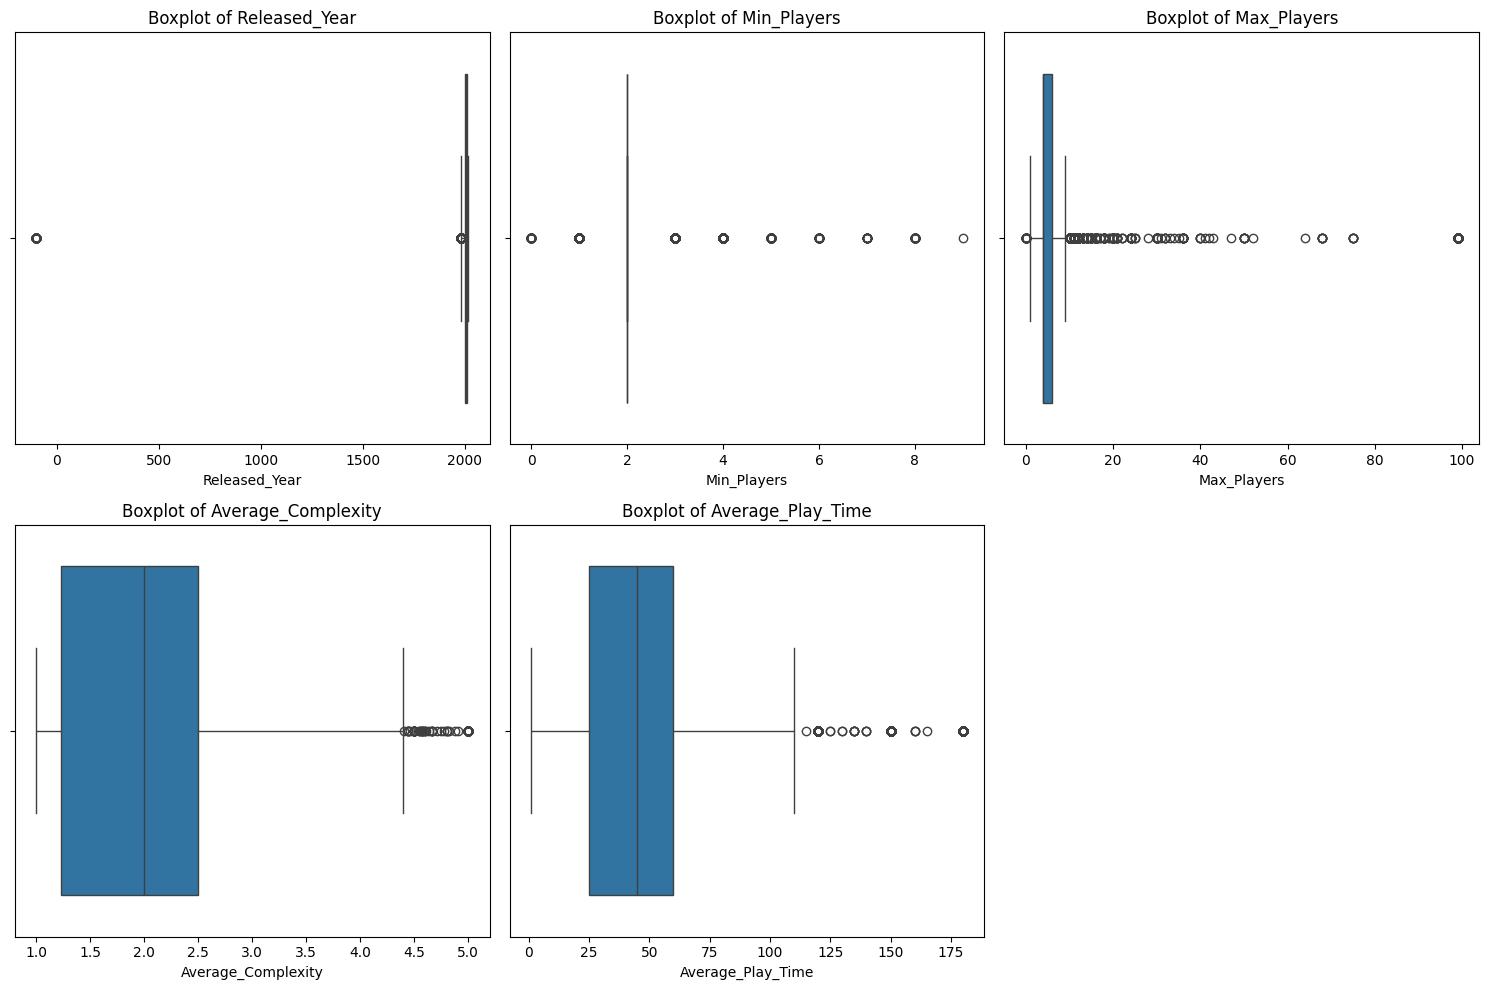

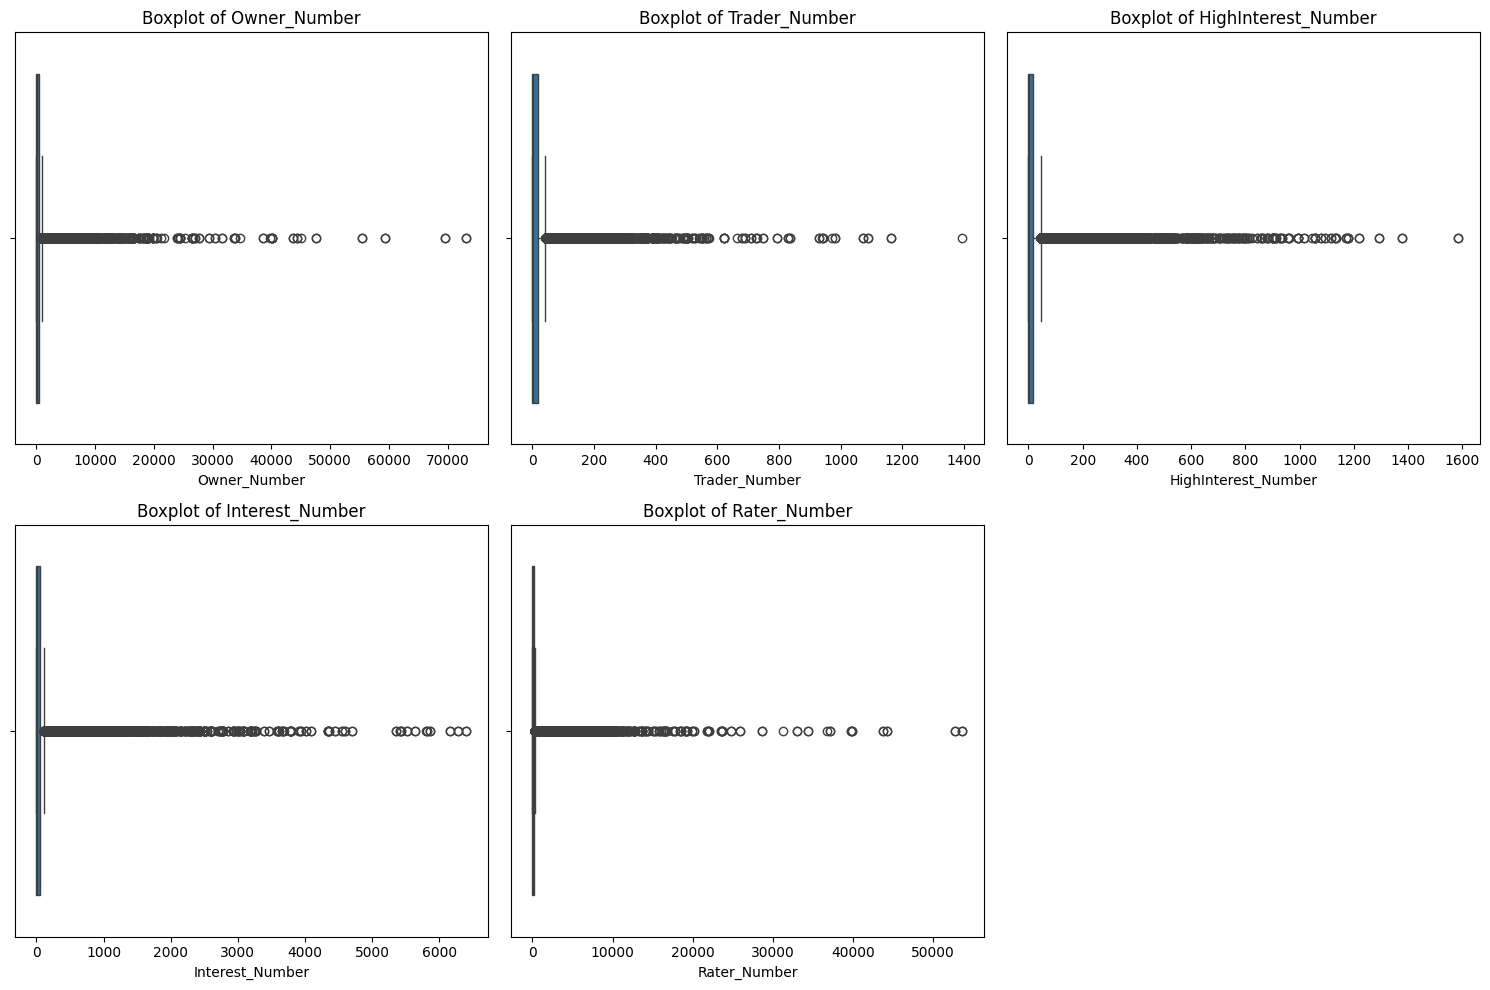

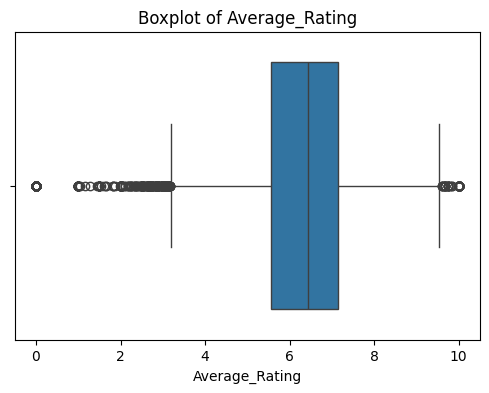

In [138]:
# Visualize outliers in these variables using boxplots
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.boxplot(x=records['Released_Year'])
plt.title('Boxplot of Released_Year')

plt.subplot(2,3,2)
sns.boxplot(x=records['Min_Players'])
plt.title('Boxplot of Min_Players')

plt.subplot(2,3,3)
sns.boxplot(x=records['Max_Players'])
plt.title('Boxplot of Max_Players')

plt.subplot(2,3,4)
sns.boxplot(x=records['Average_Complexity'])
plt.title('Boxplot of Average_Complexity')

plt.subplot(2,3,5)
sns.boxplot(x=records['Average_Play_Time'])
plt.title('Boxplot of Average_Play_Time')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.boxplot(x=records['Owner_Number'])
plt.title('Boxplot of Owner_Number')

plt.subplot(2,3,2)
sns.boxplot(x=records['Trader_Number'])
plt.title('Boxplot of Trader_Number')

plt.subplot(2,3,3)
sns.boxplot(x=records['HighInterest_Number'])
plt.title('Boxplot of HighInterest_Number')

plt.subplot(2,3,4)
sns.boxplot(x=records['Interest_Number'])
plt.title('Boxplot of Interest_Number')

plt.subplot(2,3,5)
sns.boxplot(x=records['Rater_Number'])
plt.title('Boxplot of Rater_Number')

plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=records['Average_Rating'])
plt.title('Boxplot of Average_Rating')
plt.show()


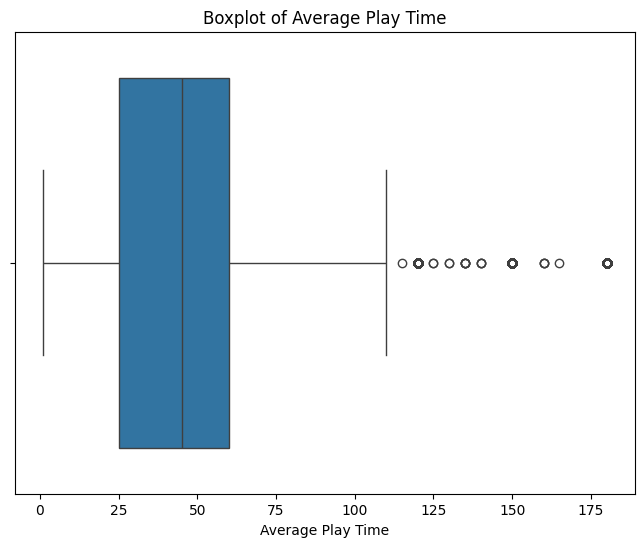

In [139]:
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.boxplot(x=records['Average_Play_Time'])
plt.title('Boxplot of Average Play Time')
plt.xlabel('Average Play Time')
plt.show()


From the above plot, we can see that the discrete variables show values that are shared by a tiny proportion of variable values in the dataset. For linear regression modeling, this does not cause any problem.

##**5. Build the First Model**

In [140]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Perform one-hot encoding on categorical variables
records_encoded = pd.get_dummies(records, columns=['Age_Category', 'Game_Type'], drop_first=True)

# Define the features and target variable
features = [
    'Released_Year', 'Min_Players', 'Max_Players', 'Average_Complexity', 'Complexity_Raters',
    'Average_Play_Time', 'Owner_Number', 'Trader_Number', 'HighInterest_Number',
    'Interest_Number', 'Rater_Number', 'Comment_Number'
] + list(records_encoded.columns[records_encoded.columns.str.startswith('Age_Category_')]) + \
    list(records_encoded.columns[records_encoded.columns.str.startswith('Game_Type_')])

X = records_encoded[features]
y = records_encoded['Average_Rating']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

# Initialize the Linear Regression model
lm = LinearRegression()

# Fit the model on the training data
lm.fit(X_train, y_train)

# Predict on the test data
y_pred = lm.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

# Print the model's performance
print(f'R² Score: {r2:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAE:{mae:.4f}')

# Print the coefficients
coefficients = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


R² Score: 0.2213
RMSE: 1.2967
MAE:0.8529
                             Coefficient
Released_Year                      0.000
Min_Players                       -0.026
Max_Players                        0.004
Average_Complexity                 0.460
Complexity_Raters                 -0.000
Average_Play_Time                 -0.000
Owner_Number                       0.000
Trader_Number                     -0.001
HighInterest_Number                0.004
Interest_Number                   -0.000
Rater_Number                      -0.000
Comment_Number                     0.001
Age_Category_18 to under 21       -0.378
Age_Category_21 and over           0.329
Age_Category_5 to under 12        -0.118
Age_Category_under 5              -0.287
Game_Type_PremiumGame              0.688


##**6. Build the Second Model by Reselecting the Features**

In [141]:
records_encoded = pd.get_dummies(records, columns=['Age_Category', 'Game_Type'], drop_first=True)
features = ['Min_Players', 'Average_Complexity','Average_Play_Time'] + list(records_encoded.columns[records_encoded.columns.str.startswith('Age_Category_')]) + \
    list(records_encoded.columns[records_encoded.columns.str.startswith('Game_Type_')])
X = records_encoded[features]

In [142]:
y=records['Average_Rating']
y.head()

,Average_Rating
0,7.519
1,7.500
2,6.488
3,7.661
4,7.500


In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)


##**7. Training the Model**

In [144]:
from sklearn.linear_model import LinearRegression


In [145]:
lm = LinearRegression()

In [146]:
lm.fit(X_train,y_train)

LinearRegression()

In [147]:
coefficients = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                             Coefficient
Min_Players                       -0.027
Average_Complexity                 0.517
Average_Play_Time                  0.000
Age_Category_18 to under 21       -0.482
Age_Category_21 and over           0.232
Age_Category_5 to under 12        -0.144
Age_Category_under 5              -0.400
Game_Type_PremiumGame              0.711


In [148]:
predictions = lm.predict(X_test)

##**8. Predicting Test Data**

Text(0, 0.5, 'Predicted Y')

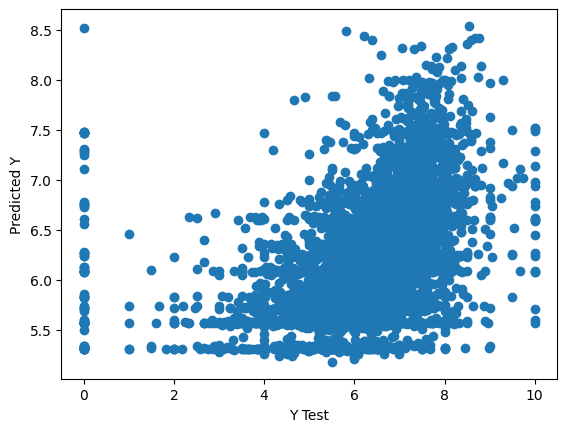

In [149]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

##**9. Evaluating the Model**


In [150]:
print('R^2:', r2_score(y_test, predictions))
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))

R^2: 0.19002112743533872
MAE: 0.8918782223753478
MSE: 1.7489052770470253


##**10. Residuals**

Let's quickly explore the residuals to make sure everything was okay with our data.

**Plot a histogram of the residuals and make sure it looks normally distributed**

Shape of y_test: (4963,)
Shape of predictions: (4963,)


<ipython-input-151-e9424818a41e>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, bins=50)


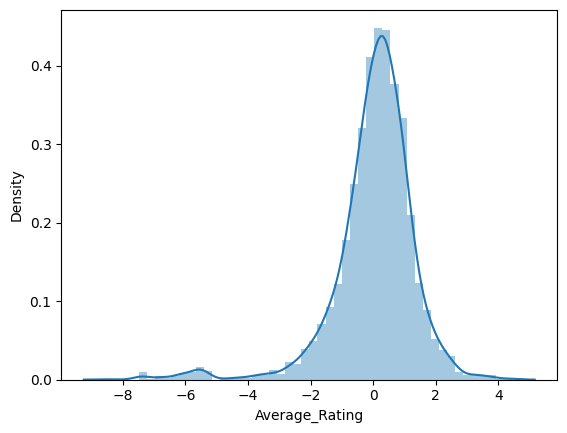

In [151]:
print("Shape of y_test:", y_test.shape)
print("Shape of predictions:", predictions.shape)
# Calculate the difference between actual and predicted values
residuals = y_test - predictions[:len(y_test)]
# Plot the distribution of residuals
sns.distplot(residuals, bins=50)
plt.show()

##**11. Random Forest Training & Performance**

In [152]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'records' is your DataFrame containing the data

# Specify the features and target variable
features = ['Game_Type', 'Age_Category', 'Released_Year', 'Min_Players', 'Max_Players',
            'Average_Complexity', 'Complexity_Raters', 'Average_Play_Time', 'Owner_Number',
            'Trader_Number', 'HighInterest_Number', 'Interest_Number', 'Rater_Number',
            'Comment_Number']
target = 'Average_Rating'

# Split the data into training and testing sets
X = records[features]
y = records[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a column transformer to handle categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), ['Game_Type', 'Age_Category'])
    ],
    remainder='passthrough'  # Leave the rest of the columns unchanged
)

# Create a pipeline that first preprocesses the data and then applies the Random Forest model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'R² Score: {r2:.4f}')
print(f'RMSE: {rmse:.4f}')

# Get the feature importances
importances = model.named_steps['regressor'].feature_importances_

# Get the feature names after one-hot encoding
categorical_features = model.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(['Game_Type', 'Age_Category'])
numerical_features = features[2:]  # The rest of the features are numerical

# Combine the feature names
all_feature_names = list(categorical_features) + numerical_features

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({'Feature': all_feature_names, 'Importance': importances})

# Sort feature importances by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importances)


R² Score: 0.7051
RMSE: 0.8622
                        Feature  Importance
15                 Rater_Number       0.366
8            Average_Complexity       0.141
5                 Released_Year       0.126
14              Interest_Number       0.070
11                 Owner_Number       0.053
13          HighInterest_Number       0.043
10            Average_Play_Time       0.038
12                Trader_Number       0.032
7                   Max_Players       0.032
16               Comment_Number       0.031
0         Game_Type_PremiumGame       0.022
9             Complexity_Raters       0.017
6                   Min_Players       0.014
3    Age_Category_5 to under 12       0.008
4          Age_Category_under 5       0.006
1   Age_Category_18 to under 21       0.002
2      Age_Category_21 and over       0.000


##**12. Random Forest Feature Importance Visualisation**

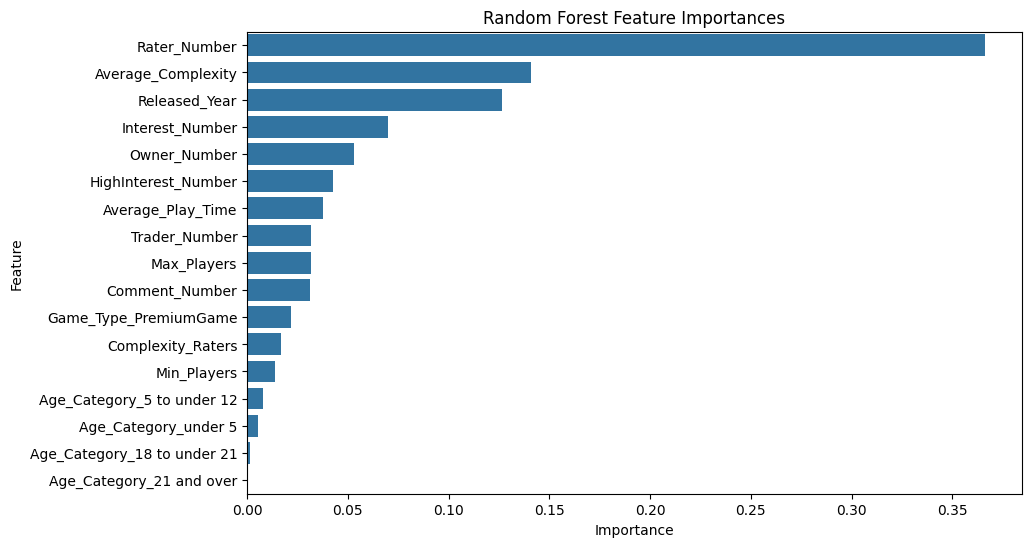

In [153]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()